In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Dataset/Photos.rar", outdir="/content")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 KB 6.7 MB/s eta 0:00:00
patool: Extracting /content/drive/MyDrive/Dataset/Photos.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Dataset/Photos.rar
patool:     with cwd='/content'
patool: ... /content/drive/MyDrive/Dataset/Photos.rar extracted to `/content'.


'/content'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
print("Number of female photos:",len('/content/Photos/Female'))
print("Number of male photos:",len('/content/Photos/Male'))

Number of female photos: 22
Number of male photos: 20


In [ ]:
os.mkdir('train')
os.mkdir('valid')

In [ ]:
os.mkdir('train/male')
os.mkdir('valid/female')
os.mkdir('train/female')
os.mkdir('valid/male')

In [ ]:
dir_1 = '/content/Photos/Male'
dir_2 = '/content/train/male'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/male'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
dir_1 = '/content/Photos/Female'
dir_2 = '/content/train/female'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/female'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (256,256),
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/valid',
    target_size = (256,256),
    class_mode = 'binary'
)

Found 30 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


# Early Stopping

In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(256, 256, 3), filters=128,kernel_size=(7,7), padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     18944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     409728    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        401472    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=0)

In [ ]:
model_fit = model.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen,
                      callbacks = [early_stopping])

Epoch 1/20
1/1 [==============================] - 14s 14s/step - loss: 0.6929 - accuracy: 0.5667 - val_loss: 0.6866 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 1s 593ms/step - loss: 0.6903 - accuracy: 0.5000 - val_loss: 0.6761 - val_accuracy: 0.5333
Epoch 3/20
1/1 [==============================] - 1s 507ms/step - loss: 0.6803 - accuracy: 0.5000 - val_loss: 0.7164 - val_accuracy: 0.4667
Epoch 4/20
1/1 [==============================] - 0s 431ms/step - loss: 0.7058 - accuracy: 0.5333 - val_loss: 0.7368 - val_accuracy: 0.5333
Epoch 5/20
1/1 [==============================] - 1s 533ms/step - loss: 0.7583 - accuracy: 0.5000 - val_loss: 0.6817 - val_accuracy: 0.5333
Epoch 6/20
1/1 [==============================] - 1s 564ms/step - loss: 0.6839 - accuracy: 0.5000 - val_loss: 0.6846 - val_accuracy: 0.5333
Epoch 7/20
1/1 [==============================] - 1s 555ms/step - loss: 0.6878 - accuracy: 0.5333 - val_loss: 0.6853 - val_accuracy: 0.5333


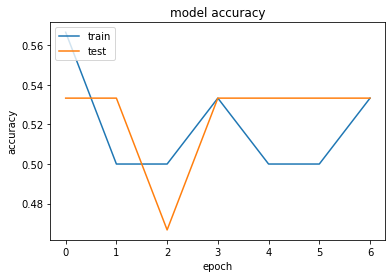

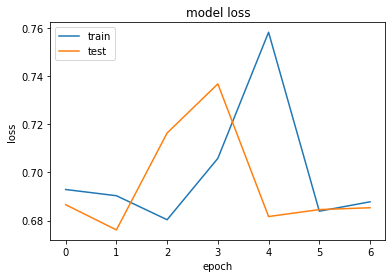

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# L1 Regularization

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model1 = Sequential()
model1.add(layers.Conv2D(input_shape=(256, 256, 3), filters=128,kernel_size=(7,7), padding="same",activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (7, 7), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))



model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L1(l1=0.01)))
model1.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L1(l1=0.01)))
model1.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.L1(l1=0.01)))
model1.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 128)     18944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 128)     409728    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        401472    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model1.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 87.8334 - accuracy: 0.5000 - val_loss: 86.0479 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 0s 483ms/step - loss: 86.0497 - accuracy: 0.5000 - val_loss: 84.2777 - val_accuracy: 0.5333
Epoch 3/20
1/1 [==============================] - 1s 501ms/step - loss: 84.2798 - accuracy: 0.5000 - val_loss: 82.5213 - val_accuracy: 0.5333
Epoch 4/20
1/1 [==============================] - 0s 486ms/step - loss: 82.5263 - accuracy: 0.5000 - val_loss: 80.7952 - val_accuracy: 0.6000
Epoch 5/20
1/1 [==============================] - 0s 383ms/step - loss: 80.7972 - accuracy: 0.6667 - val_loss: 79.1017 - val_accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 383ms/step - loss: 79.1332 - accuracy: 0.5000 - val_loss: 77.5705 - val_accuracy: 0.4667
Epoch 7/20
1/1 [==============================] - 0s 383ms/step - loss: 77.5530 - accuracy: 0.5000 - val_loss: 75.9177 - val_accuracy: 0.5333
Epoch 8/2

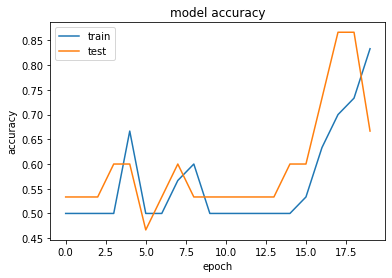

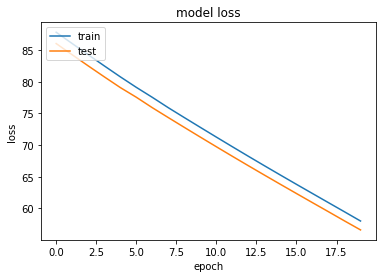

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# L2 Regularizer

In [ ]:
model2 = Sequential()
model2.add(layers.Conv2D(input_shape=(256, 256, 3), filters=128,kernel_size=(7,7), padding="same",activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (7, 7), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))



model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
model2.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))
model2.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))
model2.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 256, 256, 128)     18944     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 124, 124, 128)     409728    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 56, 56, 64)        401472    
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model2.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 6.4008 - accuracy: 0.5000 - val_loss: 6.2283 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 0s 387ms/step - loss: 6.2292 - accuracy: 0.5000 - val_loss: 6.0596 - val_accuracy: 0.5333
Epoch 3/20
1/1 [==============================] - 0s 395ms/step - loss: 6.0584 - accuracy: 0.5333 - val_loss: 5.9237 - val_accuracy: 0.5333
Epoch 4/20
1/1 [==============================] - 0s 393ms/step - loss: 5.9331 - accuracy: 0.5000 - val_loss: 5.7755 - val_accuracy: 0.4667
Epoch 5/20
1/1 [==============================] - 0s 382ms/step - loss: 5.7698 - accuracy: 0.5000 - val_loss: 5.6256 - val_accuracy: 0.4667
Epoch 6/20
1/1 [==============================] - 0s 388ms/step - loss: 5.6240 - accuracy: 0.5000 - val_loss: 5.4886 - val_accuracy: 0.4667
Epoch 7/20
1/1 [==============================] - 0s 446ms/step - loss: 5.4875 - accuracy: 0.5000 - val_loss: 5.3547 - val_accuracy: 0.4667
Epoch 8/20
1/1 [=======

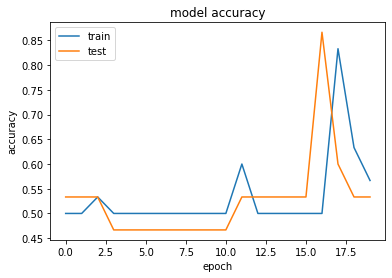

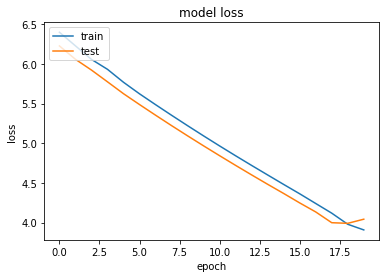

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Drop out

In [ ]:
model3 = Sequential()
model3.add(layers.Conv2D(input_shape=(256, 256, 3), filters=128,kernel_size=(7,7), padding="same",activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (5, 5), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (7, 7), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (5, 5), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))



model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 128)     18944     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 128, 128, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 124, 124, 128)     409728    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 64)        401472    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model3.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 0s 404ms/step - loss: 0.6960 - accuracy: 0.5333 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 3/20
1/1 [==============================] - 0s 443ms/step - loss: 0.6921 - accuracy: 0.5333 - val_loss: 0.6919 - val_accuracy: 0.4667
Epoch 4/20
1/1 [==============================] - 0s 415ms/step - loss: 0.6829 - accuracy: 0.6000 - val_loss: 0.6916 - val_accuracy: 0.5333
Epoch 5/20
1/1 [==============================] - 0s 388ms/step - loss: 0.7046 - accuracy: 0.4000 - val_loss: 0.6972 - val_accuracy: 0.5333
Epoch 6/20
1/1 [==============================] - 0s 395ms/step - loss: 0.7046 - accuracy: 0.4333 - val_loss: 0.6899 - val_accuracy: 0.5333
Epoch 7/20
1/1 [==============================] - 0s 389ms/step - loss: 0.7045 - accuracy: 0.4333 - val_loss: 0.6919 - val_accuracy: 0.4667
Epoch 8/20
1/1 [=======

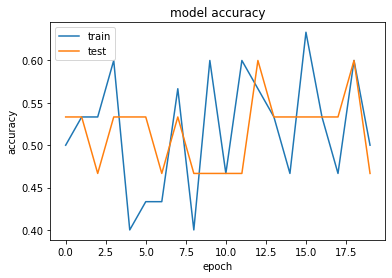

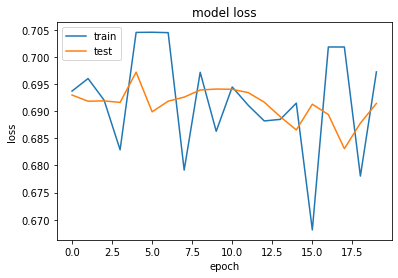

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()